<a href="https://colab.research.google.com/github/HoangHieuu/Linear-Regression/blob/main/W1_M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#data set
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
  result = [row[index] for row in data]
  return result
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  tv_data = get_column(data, 0)
  radio_data = get_column(data, 1)
  newspaper_data = get_column(data, 2)
  sales_data = get_column(data, 3)
  X = [tv_data, radio_data, newspaper_data]
  Y = sales_data
  return X, Y

In [2]:
X,Y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(Y[:5])]
print(list)
#X is a 3-row matrix with each row is one of those three data set

[624.1, 175.10000000000002, 300.5, 78.9]


In [3]:
#thực tế
#def initialize_params():
# w1 = random.gauss(mu = 0.0, sigma = 0.01)
# w2 = random.gauss(mu = 0.0, sigma = 0.01)
# w3 = random.gauss(mu = 0.0, sigma = 0.01)
# b = 0
# return w1, w2, w3, b

#Để thống nhất kết quả trong problem này
def initialize_params():
  w1, w2, w3, b = (0.016992259082509283 , 0.0070783670518262355 ,-0.002307860847821344 , 0)
  return w1, w2, w3, b
  #predict => y_hat = w1*x1 + w2*x2 + w3*x3 + b
def predict(x1,x2,x3,w1,w2,w3,b):
  result = w1*x1 + w2*x2 + w3*x3 + b
  return result
def compute_loss_mse(y, y_hat):
  loss = (y - y_hat)**2
  return loss
def compute_gradient_wi(xi, y, y_hat):
  dl_dwi = 2*xi*(y_hat - y)
  return dl_dwi
def compute_gradient_b(y, y_hat):
  dl_db = 2*(y_hat- y)
  return dl_db
def update_weight_wi(wi, dl_dwi, lr):
  wi_new = wi - lr*dl_dwi
  return wi_new
def update_weight_b(b, dl_db, lr):
  b_new = b - lr*dl_db
  return b_new
def compute_loss_mae(y, y_hat):
  loss = abs(y- y_hat)
  return loss

In [ ]:
y = predict(x1 = 1, x2 = 1, x3 = 1, w1 = 0 , w2 = 0.5, w3 = 0, b = 0.5)
print(y)

1.0


In [ ]:
l = compute_loss_mse(y_hat = 1, y = 0.5)
print(l)

0.25


In [ ]:
g_wi = compute_gradient_wi(xi =1.0 , y =1.0 , y_hat =0.5)
print (g_wi)

-1.0


In [ ]:
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

(0.5, 2.0, 0.5, 2.0)


In [ ]:
after_wi = update_weight_wi( wi =1.0 , dl_dwi = -0.5 , lr = 1e-5)
print ( after_wi )

1.000005


In [ ]:
after_b = update_weight_b( b =0.5 , dl_db = -1.0 , lr = 1e-5)
print ( after_b )

0.50001


In [4]:
def implement_linear_regression(X_data, Y_data, epoch_max = 50, lr = 1e-5):
  losses = []
  w1, w2, w3, b = initialize_params()
  N = len(Y_data)
  for epoch in range(epoch_max):
    for i in range(N):
      #get a sample
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = Y_data[i]

      #compute output
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      #compute loss
      loss = compute_loss_mae(y, y_hat)

      #compute gradient w1, w2, w3, b
      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_db = compute_gradient_b(y, y_hat)

      #update weight
      w1  = update_weight_wi(w1, dl_dw1, lr)
      w2  = update_weight_wi(w2, dl_dw2, lr)
      w3  = update_weight_wi(w3, dl_dw3, lr)
      b = update_weight_b(b, dl_db, lr)

      #logging
      losses.append(loss)
  return (w1,w2,w3,b,losses)



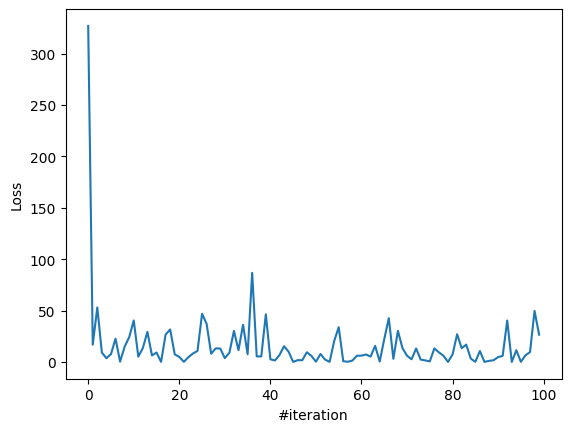

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, Y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [ ]:
X,Y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, Y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [ ]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X , Y = prepare_data('advertising.csv')
( w1 , w2 , w3 , b , losses ) = implement_linear_regression(X , Y , epoch_max =50 , lr =1e-5)
#tv = x1
#radio = x2
#newspaper = x3
sales = predict( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f' predicted sales is { sales }')

 predicted sales is 8.176413319549823


In [ ]:
l = compute_loss_mae ( y_hat =1 , y =0.5)
print ( l )

0.5


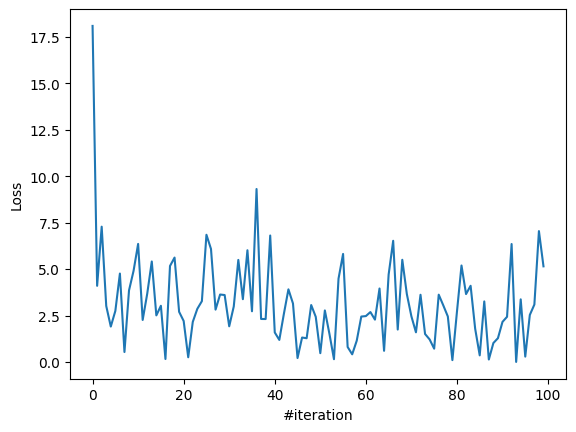

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, Y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [22]:
#n-samples
def implement_linear_regression_nsamples(X_data, Y_data, epoch_max = 50, lr = 1e-5):
  losses = []

  w1,w2,w3,b = initialize_params()
  N = len(Y_data)
  for epoch in range(epoch_max):
    loss_total = 0.0
    dw1_total = 0.0
    dw2_total = 0.0
    dw3_total = 0.0
    db_total = 0.0
    for i in range(N):
      #get a sample
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = Y_data[i]

      #compute output
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      #compute loss
      loss = compute_loss_mse(y, y_hat)

      #accumulate loss
      loss_total += loss

      #compute gradient w1, w2, w3, b
      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_db = compute_gradient_b(y, y_hat)

      #accumulate gradient
      dw1_total += dl_dw1
      dw2_total += dl_dw2
      dw3_total += dl_dw3
      db_total += dl_db

      #after processing n samples - update parameters
      w1 -= lr * (dw1_total / N)
      w2 -= lr * (dw2_total / N)
      w3 -= lr * (dw3_total / N)
      b -= lr * (db_total / N)

      # Ghi lại loss trung bình của epoch
    losses.append(loss_total / N)
    print(f"Epoch {epoch+1}/{epoch_max}, Loss: {losses[-1]}")

  return w1, w2, w3, b, losses



Epoch 1/1000, Loss: 45.133471977116585
Epoch 2/1000, Loss: 13.675589481827783
Epoch 3/1000, Loss: 13.237058087822334
Epoch 4/1000, Loss: 7.322320451656607
Epoch 5/1000, Loss: 7.728987048126747
Epoch 6/1000, Loss: 7.060937054827847
Epoch 7/1000, Loss: 6.969506051350997
Epoch 8/1000, Loss: 6.85628465924483
Epoch 9/1000, Loss: 6.803772594785232
Epoch 10/1000, Loss: 6.769342934317539
Epoch 11/1000, Loss: 6.748000683180468
Epoch 12/1000, Loss: 6.734104173903458
Epoch 13/1000, Loss: 6.724700852947263
Epoch 14/1000, Loss: 6.7181004135287825
Epoch 15/1000, Loss: 6.713235920529354
Epoch 16/1000, Loss: 6.709467148633584
Epoch 17/1000, Loss: 6.706389791144901
Epoch 18/1000, Loss: 6.703751262648951
Epoch 19/1000, Loss: 6.701391740733799
Epoch 20/1000, Loss: 6.699210031197403
Epoch 21/1000, Loss: 6.697141870563533
Epoch 22/1000, Loss: 6.695146398431515
Epoch 23/1000, Loss: 6.6931976113083635
Epoch 24/1000, Loss: 6.691278950687048
Epoch 25/1000, Loss: 6.689379868708399
Epoch 26/1000, Loss: 6.6874936

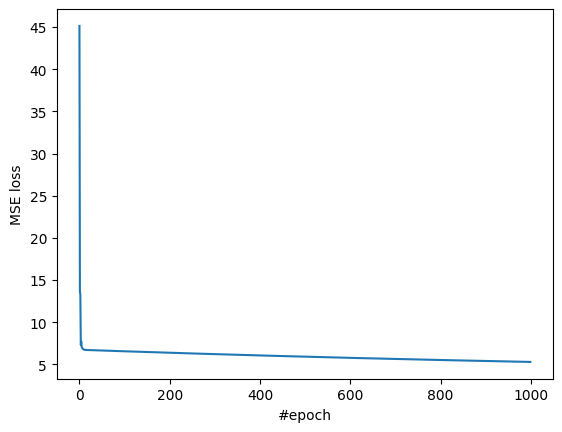

In [23]:
(w1,w2,w3,b,losses) = implement_linear_regression_nsamples(X,Y, epoch_max = 1000, lr = 1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE loss")
plt.show()

In [24]:
X , y = prepare_data ('advertising.csv')
# using MSE loss
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples(X , y , epoch_max =1000 , lr =1e-5)

print ( w1 , w2 , w3 )

Epoch 1/1000, Loss: 45.133471977116585
Epoch 2/1000, Loss: 13.675589481827783
Epoch 3/1000, Loss: 13.237058087822334
Epoch 4/1000, Loss: 7.322320451656607
Epoch 5/1000, Loss: 7.728987048126747
Epoch 6/1000, Loss: 7.060937054827847
Epoch 7/1000, Loss: 6.969506051350997
Epoch 8/1000, Loss: 6.85628465924483
Epoch 9/1000, Loss: 6.803772594785232
Epoch 10/1000, Loss: 6.769342934317539
Epoch 11/1000, Loss: 6.748000683180468
Epoch 12/1000, Loss: 6.734104173903458
Epoch 13/1000, Loss: 6.724700852947263
Epoch 14/1000, Loss: 6.7181004135287825
Epoch 15/1000, Loss: 6.713235920529354
Epoch 16/1000, Loss: 6.709467148633584
Epoch 17/1000, Loss: 6.706389791144901
Epoch 18/1000, Loss: 6.703751262648951
Epoch 19/1000, Loss: 6.701391740733799
Epoch 20/1000, Loss: 6.699210031197403
Epoch 21/1000, Loss: 6.697141870563533
Epoch 22/1000, Loss: 6.695146398431515
Epoch 23/1000, Loss: 6.6931976113083635
Epoch 24/1000, Loss: 6.691278950687048
Epoch 25/1000, Loss: 6.689379868708399
Epoch 26/1000, Loss: 6.6874936

In [12]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter = ',', skip_header= 1 ).tolist()
  tv_data = get_column(data, 0)
  radio_data = get_column(data, 1)
  newspaper_data = get_column(data, 2)
  sales_data = get_column(data, 3)
  #building X input and y output for training
  #create list of features for input
  X = [[1,x1,x2,x3] for x1,x2,x3 in zip(tv_data, radio_data, newspaper_data)]
  Y = sales_data
  return X, Y

In [5]:
def initialize_params():
  bias = 0
  w1 = random.gauss(mu = 0.0, sigma = 0.01)
  w2 = random.gauss(mu = 0.0, sigma = 0.01)
  w3 = random.gauss(mu = 0.0, sigma = 0.01)
  # comment this line for real application
  return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
  # return [bias , w1 , w2 , w3]

In [15]:
# predict output using x0*b + x1*w1 + x2*w2 + x3*w3
def predict(X_features, weight):
  result = np.dot(X_features, weight)
  return result

def compute_loss(y_hat, y):
  loss = (y_hat - y)**2
  return loss

def compute_gradient_w(X_features, y_hat, y):
  X_features = np.array(X_features)
  dl_dweights = 2*(y_hat - y)*X_features
  return dl_dweights

def update_weight(weight, dl_dweights, lr):
  weights = weight - lr*dl_dweights
  return weights

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


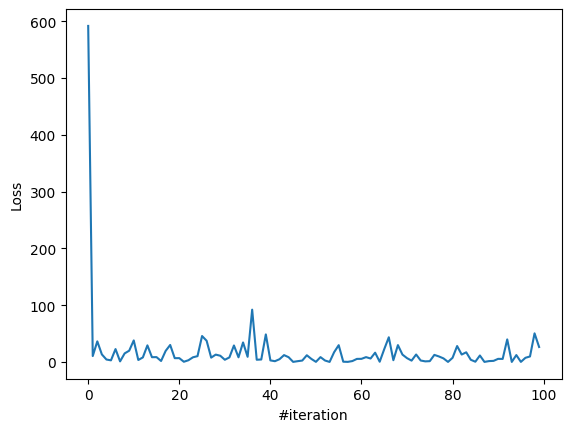

In [17]:
def implement_linear_regression(X_feature, Y_output, epoch_max = 50, lr = 1e-5):
  losses = []
  weights = initialize_params()
  N = len(Y_output)
  for epoch in range(epoch_max):
    print("epoch", epoch)
    for i in range(N):
      feature_i = X_feature[i]
      y = Y_output[i]

      y_hat = predict(feature_i, weights)

      loss = compute_loss(y_hat, y)

      dl_dweights = compute_gradient_w(feature_i, y_hat, y)

      weights = update_weight(weights, dl_dweights, lr)

      #logging
      losses.append(loss)
  return weights, losses

X,Y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X, Y, epoch_max = 50, lr =1e-5)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [20]:
X , y = prepare_data ( 'advertising.csv')
W , L = implement_linear_regression(X , y , epoch_max =50 , lr =1e-5)
# Print loss value at iteration 9999
print ( L [9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.339223408109948
